# Prelude

In [1]:
import osmnx as ox
import numpy as np
import geocoder
import pandas as pd
import copy
import datetime
import matplotlib.pyplot as plt
import itertools
import random

In [2]:
jobs_dataframe = pd.read_excel('complete_original_task_list.xlsx')

jobs_dataframe

Id                               Reference  \
0    0       Frida's Corso Genova02_2023-11-21   
1    1       Frida's Corso Genova02_2023-11-21   
2    2            Fiori Fumagalli03_2023-11-21   
3    3                    Cafezal02_2023-11-21   
4    4                      Clori03_2023-11-21   
5    5            Fiori Fumagalli03_2023-11-21   
6    6            Fiori Fumagalli03_2023-11-21   
7    7        La teiera Eclettica01_2023-11-21   
8    8        La teiera Eclettica01_2023-11-21   
9    9                 Dolcemente01_2023-11-20   
10  10                 Florarredo01_2023-11-21   
11  11                 Florarredo01_2023-11-21   
12  12  Pasticceria Grecchi Luigi01_2023-11-21   
13  13  Pasticceria Grecchi Luigi01_2023-11-21   
14  14         Au Nome de la Rose01_2023-11-21   
15  15         Au Nome de la Rose01_2023-11-21   
16  16                        Cosaporto_603825   
17  17                        Cosaporto_603825   
18  18         Pasticceria Spezia01_2023-11-20   
19  19         Pasticceria Spezia01_2023-11-20   
20  20                    Bibilab02_2023-11-20   
21  21                    Bibilab02_2023-11-20   
22  22                    Bibilab02_2023-11-20   
23  23                 Dolcemente01_2023-11-20   
24  24           Walter Calzature01_2023-11-17   
25  25                             1952_452_92   
26  26                        Cosaporto_603053   
27  27                        Cosaporto_603053   
28  28                  PastaFra 01_2023-11-20   
29  29                  PastaFra 01_2023-11-20   
30  30                  PastaFra 01_2023-11-20   
31  31           Walter Calzature03_2023-11-20   
32  32           Walter Calzature03_2023-11-20   
33  33                             1950_450_92   
34  34           Alveare Basiglio01_2023-11-20   
35  35           Alveare Basiglio01_2023-11-20   
36  36           Alveare Basiglio01_2023-11-20   
37  37           Alveare Basiglio01_2023-11-20   
38  38           Alveare Basiglio01_2023-11-20   
39  39       Alveare del Naviglio01_2023-11-20   
40  40       Alveare del Naviglio01_2023-11-20   
41  41        Alveare Terzo Tempo01_2023-11-20   

                                              Address  Start travel  \
0            Via Ettore Ponti, 58, Milano, MI, Italia             0   
1             Corso Genova, 6, 20123 Milano MI, Italy             0   
2             Foro Buonaparte, 22, Milano, MI, Italia             0   
3                   Via Larga, 13, Milano, MI, Italia             0   
4   Via Larga, 19, Milan, Metropolitan City of Mil...             0   
5                 Via Messina, 47, Milano, MI, Italia             0   
6     Piazza Guglielmo Oberdan, 2, Milano, MI, Italia             0   
7   Via Piero della Francesca, 74, Milano, MI, Italia             0   
8   La Teiera Eclettica, Via Melzo, 30, Milano, MI...             0   
9              Via Mario Pichi, 8, Milano, MI, Italia             0   
10   Via Gaetano de Castillia, 6A, Milano, MI, Italia             0   
11  Piazza della Repubblica, 32, 20124 Milano MI, ...             0   
12      Via Felice Casati, 45, 20124 Milano MI, Italy             0   
13  Via Piero della Francesca, 7, 20154 Milano MI,...             0   
14                  Via Moneta, 1, Milano, MI, Italia             0   
15     Piazza Riccardo Wagner, 20145 Milano MI, Italy             0   
16        Via Giovanni Cimabue, 41, Milano MI, Italia             0   
17  Via Felice Casati, 27, 20124 Milano, Milano MI...             0   
18              Via Amedei, 8, 20123 Milano MI, Italy             0   
19              Via la Spezia, 26, Milano, MI, Italia             0   
20                  Via Seprio, 2, Milano, MI, Italia             0   
21        Via Caminadella, 18, 20123 Milano MI, Italy             0   
22     Via Mario Pannunzio, 4, 20156 Milano MI, Italy             0   
23  Via Privata Giovanni Ventura, 5, Milano, MI, I...             0   
24      via Val di Fiemme, 25, 20128 Milano MI, Italy             0   
25     

In [3]:
jobs_dataframe.at[19, 'Address'] = 'Via Spezia, 26, Milano, MI, Italia'
jobs_dataframe.at[31, 'Address'] = 'Via delle Forze Armate, 50, Milano, MI, Italia'
jobs_dataframe.at[33, 'Address'] = 'Via Giuseppe Ripamonti, 27, 20135 Milano MI, Italy'
jobs_dataframe.at[38, 'Address'] = 'Via Borgo del Maino, 1a, 20080 Basiglio Basiglio MI, Italy'

jobs_dataframe.at[34, 'Address']

'Via Pietro Nenni, 40, 20085 Locate di Triulzi MI, Italia'

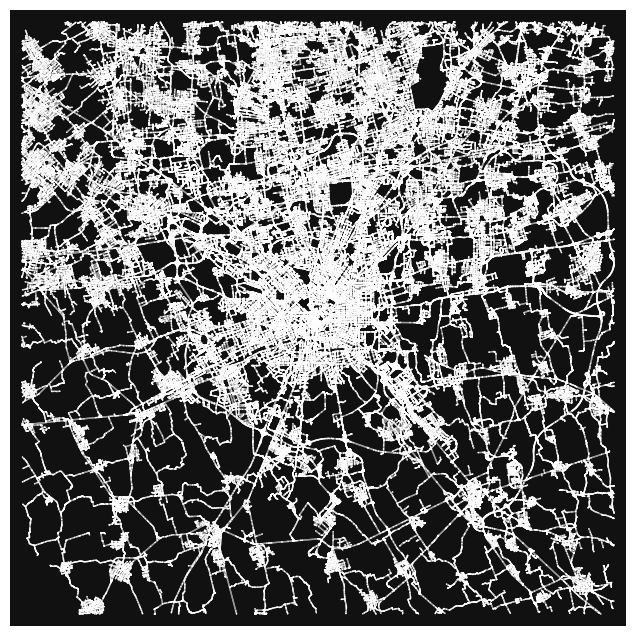

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
#G = ox.graph_from_place('Milan, Italy', network_type='drive', simplify=False)
start = datetime.datetime.now()
G = ox.graph_from_point((45.464664, 9.188540), dist=20000, network_type='drive', simplify=False)

G = ox.distance.add_edge_lengths(G)
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

end = datetime.datetime.now()

map_time = end-start

ox.plot_graph(G, node_size=1)

In [5]:
edge_attributes = ox.graph_to_gdfs(G, nodes=False).columns
print(edge_attributes)

Index(['osmid', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed',
       'reversed', 'length', 'speed_kph', 'travel_time', 'bridge', 'junction',
       'tunnel', 'access', 'width', 'est_width', 'area', 'geometry'],
      dtype='object')


In [6]:
starting_point = 'Via Olona, 2, 20123 Milano MI, Italy'

In [7]:
g = geocoder.osm(starting_point)

g.json

{'accuracy': 9.99999999995449e-06,
 'address': '2, Via Olona, Magenta - San Vittore, Municipio 1, Milano, Lombardia, 20123, Italia',
 'bbox': {'northeast': [45.4617922, 9.1729582],
  'southwest': [45.4616922, 9.1728582]},
 'city': 'Milano',
 'confidence': 10,
 'country': 'Italia',
 'country_code': 'it',
 'county': 'Milano',
 'housenumber': '2',
 'importance': 9.99999999995449e-06,
 'lat': 45.4617422,
 'lng': 9.1729082,
 'ok': True,
 'osm_id': 5336417850,
 'osm_type': 'node',
 'place_id': 96706289,
 'place_rank': 30,
 'postal': '20123',
 'quality': 'house',
 'quarter': 'Magenta - San Vittore',
 'raw': {'place_id': 96706289,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 5336417850,
  'lat': '45.4617422',
  'lon': '9.1729082',
  'category': 'place',
  'type': 'house',
  'place_rank': 30,
  'importance': 9.99999999995449e-06,
  'addresstype': 'place',
  'name': '',
  'display_name': '2, Via Olona, Magenta - San Vitto

In [8]:
lat, lon = g.json['lat'], g.json['lng']

node = ox.distance.nearest_nodes(G, lon, lat)

node

272714832

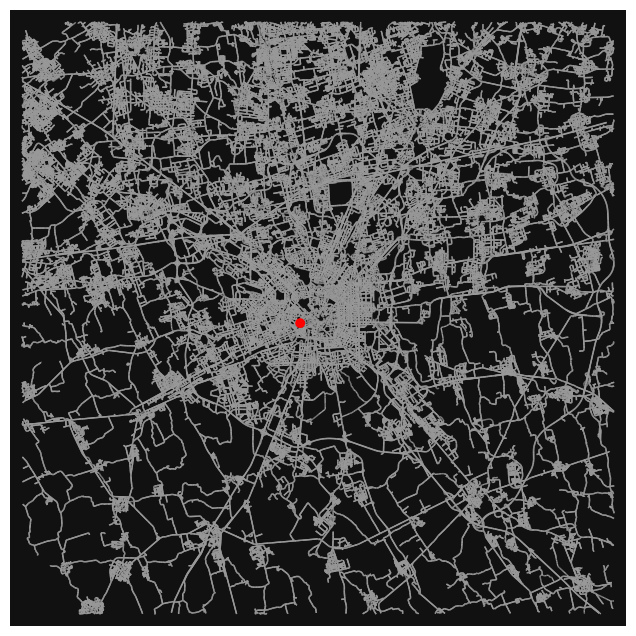

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
nc = []
ns = []

for n in G.nodes():
    if n!=node:
        nc.append('w')
        ns.append(0)
    else:
        nc.append('r')
        ns.append(50)

ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

In [10]:
ex_node_string = jobs_dataframe.to_dict()['Address'][0]

g = geocoder.osm(ex_node_string)

ex_node = ox.distance.nearest_nodes(G, g.json['lng'], g.json['lat'])

ex_node

21306387

In [11]:
route = ox.routing.shortest_path(G, node, ex_node, weight='travel_time', cpus=None)

route

[272714832,
 9320728599,
 2125505427,
 4548256838,
 91533559,
 4199922468,
 1529787471,
 24576291,
 4199922470,
 21389423,
 232879844,
 8742975981,
 10199274346,
 2588305416,
 21389421,
 21440488,
 2588305402,
 5382583777,
 1938479848,
 21555669,
 1938479847,
 5382583779,
 1494212565,
 10090411368,
 5270092035,
 11343160344,
 5270092038,
 5270092036,
 2817507684,
 3623121419,
 3623120157,
 21298354,
 5270092040,
 11343160346,
 1947907242,
 1947907237,
 11176460949,
 4885413495,
 10090411365,
 4885410809,
 4885413493,
 4885413492,
 2784839449,
 2784839451,
 2784839453,
 2784839457,
 4885413501,
 2784839458,
 4885413502,
 2784839448,
 4885413498,
 21298358,
 2784839441,
 2784839438,
 2784839435,
 4885410813,
 4885410814,
 4885410815,
 4885410812,
 10090411363,
 4885413422,
 1947907222,
 1947907220,
 2784839396,
 2784839394,
 3344627014,
 2798072023,
 9392101134,
 3344627012,
 1947907212,
 4886102444,
 4886101946,
 4886101932,
 1947907211,
 4886101935,
 4886101938,
 3611302816,
 194790720

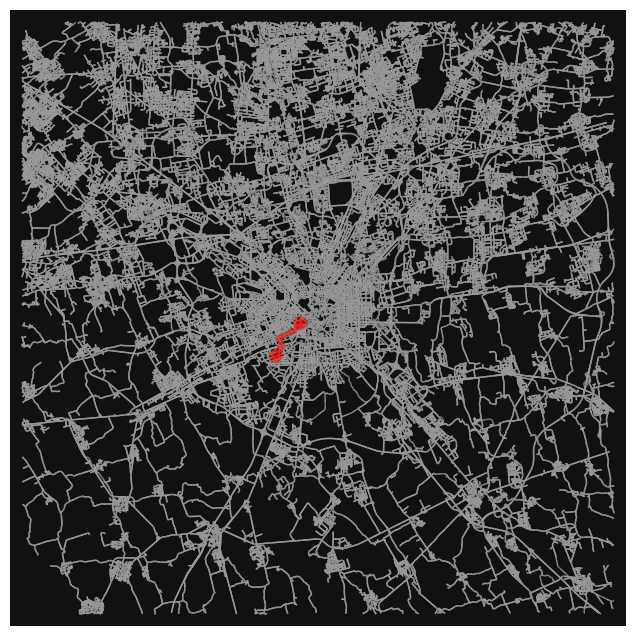

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [12]:
ox.plot_graph_route(G, route, node_size=0)

In [13]:
travel_time = 0

for u, v in zip(route, route[1:]):
    travel_time += G.edges[u,v,0]['travel_time']

travel_time

284.9

# Ant Colony

In [14]:
jobs_dataframe

Id                               Reference  \
0    0       Frida's Corso Genova02_2023-11-21   
1    1       Frida's Corso Genova02_2023-11-21   
2    2            Fiori Fumagalli03_2023-11-21   
3    3                    Cafezal02_2023-11-21   
4    4                      Clori03_2023-11-21   
5    5            Fiori Fumagalli03_2023-11-21   
6    6            Fiori Fumagalli03_2023-11-21   
7    7        La teiera Eclettica01_2023-11-21   
8    8        La teiera Eclettica01_2023-11-21   
9    9                 Dolcemente01_2023-11-20   
10  10                 Florarredo01_2023-11-21   
11  11                 Florarredo01_2023-11-21   
12  12  Pasticceria Grecchi Luigi01_2023-11-21   
13  13  Pasticceria Grecchi Luigi01_2023-11-21   
14  14         Au Nome de la Rose01_2023-11-21   
15  15         Au Nome de la Rose01_2023-11-21   
16  16                        Cosaporto_603825   
17  17                        Cosaporto_603825   
18  18         Pasticceria Spezia01_2023-11-20   
19  19         Pasticceria Spezia01_2023-11-20   
20  20                    Bibilab02_2023-11-20   
21  21                    Bibilab02_2023-11-20   
22  22                    Bibilab02_2023-11-20   
23  23                 Dolcemente01_2023-11-20   
24  24           Walter Calzature01_2023-11-17   
25  25                             1952_452_92   
26  26                        Cosaporto_603053   
27  27                        Cosaporto_603053   
28  28                  PastaFra 01_2023-11-20   
29  29                  PastaFra 01_2023-11-20   
30  30                  PastaFra 01_2023-11-20   
31  31           Walter Calzature03_2023-11-20   
32  32           Walter Calzature03_2023-11-20   
33  33                             1950_450_92   
34  34           Alveare Basiglio01_2023-11-20   
35  35           Alveare Basiglio01_2023-11-20   
36  36           Alveare Basiglio01_2023-11-20   
37  37           Alveare Basiglio01_2023-11-20   
38  38           Alveare Basiglio01_2023-11-20   
39  39       Alveare del Naviglio01_2023-11-20   
40  40       Alveare del Naviglio01_2023-11-20   
41  41        Alveare Terzo Tempo01_2023-11-20   

                                              Address  Start travel  \
0            Via Ettore Ponti, 58, Milano, MI, Italia             0   
1             Corso Genova, 6, 20123 Milano MI, Italy             0   
2             Foro Buonaparte, 22, Milano, MI, Italia             0   
3                   Via Larga, 13, Milano, MI, Italia             0   
4   Via Larga, 19, Milan, Metropolitan City of Mil...             0   
5                 Via Messina, 47, Milano, MI, Italia             0   
6     Piazza Guglielmo Oberdan, 2, Milano, MI, Italia             0   
7   Via Piero della Francesca, 74, Milano, MI, Italia             0   
8   La Teiera Eclettica, Via Melzo, 30, Milano, MI...             0   
9              Via Mario Pichi, 8, Milano, MI, Italia             0   
10   Via Gaetano de Castillia, 6A, Milano, MI, Italia             0   
11  Piazza della Repubblica, 32, 20124 Milano MI, ...             0   
12      Via Felice Casati, 45, 20124 Milano MI, Italy             0   
13  Via Piero della Francesca, 7, 20154 Milano MI,...             0   
14                  Via Moneta, 1, Milano, MI, Italia             0   
15     Piazza Riccardo Wagner, 20145 Milano MI, Italy             0   
16        Via Giovanni Cimabue, 41, Milano MI, Italia             0   
17  Via Felice Casati, 27, 20124 Milano, Milano MI...             0   
18              Via Amedei, 8, 20123 Milano MI, Italy             0   
19                 Via Spezia, 26, Milano, MI, Italia             0   
20                  Via Seprio, 2, Milano, MI, Italia             0   
21        Via Caminadella, 18, 20123 Milano MI, Italy             0   
22     Via Mario Pannunzio, 4, 20156 Milano MI, Italy             0   
23  Via Privata Giovanni Ventura, 5, Milano, MI, I...             0   
24      via Val di Fiemme, 25, 20128 Milano MI, Italy             0   
25     

In [15]:
def get_jobs(df = jobs_dataframe, graph = G, starting_point = 272714832):
    job_list = []
    ref_map = {'Via Olona, 2, 20123 Milano MI, Italy': {'id': 0, 'has_pick_up': True}}
    map_value = 1

    job_list.append({'id': 0, 'pick_up': True, 'node': starting_point})
    
    for i, row in df.iterrows():
        job = {}
        if row['Reference'] not in ref_map:
            ref_map[row['Reference']] = {}
            ref_map[row['Reference']]['id'] = map_value
            ref_map[row['Reference']]['has_pick_up'] = False
            map_value += 1
        job['id'] = ref_map[row['Reference']]['id']
        if row['Category']=='drop_off':
            job['pick_up'] = False
        else:
            job['pick_up'] = True
            ref_map[row['Reference']]['has_pick_up'] = True
        g = geocoder.osm(row['Address']).json
        job['node'] = ox.distance.nearest_nodes(graph, g['lng'], g['lat'])
        job_list.append(job)

    for k in ref_map:
        if ref_map[k]['has_pick_up']:
            continue
        else:
            job_list.append({'id': ref_map[k]['id'], 'pick_up': True, 'node': 272714832})

    return job_list, ref_map

In [16]:
start = datetime.datetime.now()

job_list, ref_map = get_jobs()

end = datetime.datetime.now()

geocode_time = end-start

In [17]:
for i in range(len(job_list)):
    print(i, job_list[i])

'''orphan drops
3 {'id': 0, 'pick_up': False, 'node': 4450723184}
4 {'id': 0, 'pick_up': False, 'node': 2798464159}
9 {'id': 0, 'pick_up': False, 'node': 4077180102}
23 {'id': 0, 'pick_up': False, 'node': 2569745551}
24 {'id': 0, 'pick_up': False, 'node': 9081821105}
25 {'id': 0, 'pick_up': False, 'node': 1500678525}
31 {'id': 0, 'pick_up': False, 'node': 2799499849}
32 {'id': 0, 'pick_up': False, 'node': 257416245}
33 {'id': 0, 'pick_up': False, 'node': 2933806655}
41 {'id': 0, 'pick_up': False, 'node': 2805580935}
'''

0 {'id': 0, 'pick_up': True, 'node': 272714832}
1 {'id': 1, 'pick_up': False, 'node': 21306387}
2 {'id': 1, 'pick_up': True, 'node': 4606575331}
3 {'id': 2, 'pick_up': False, 'node': 1904605217}
4 {'id': 3, 'pick_up': False, 'node': 4450723184}
5 {'id': 4, 'pick_up': False, 'node': 2798464159}
6 {'id': 2, 'pick_up': False, 'node': 4207091672}
7 {'id': 2, 'pick_up': True, 'node': 6809885652}
8 {'id': 5, 'pick_up': False, 'node': 1465780211}
9 {'id': 5, 'pick_up': True, 'node': 9534386909}
10 {'id': 6, 'pick_up': False, 'node': 4077180102}
11 {'id': 7, 'pick_up': False, 'node': 53763202}
12 {'id': 7, 'pick_up': True, 'node': 475948960}
13 {'id': 8, 'pick_up': False, 'node': 314432522}
14 {'id': 8, 'pick_up': True, 'node': 1837603191}
15 {'id': 9, 'pick_up': False, 'node': 4060097488}
16 {'id': 9, 'pick_up': True, 'node': 2876179017}
17 {'id': 10, 'pick_up': False, 'node': 8874491833}
18 {'id': 10, 'pick_up': True, 'node': 3366661189}
19 {'id': 11, 'pick_up': False, 'node': 627561616}
20 

"orphan drops\n3 {'id': 0, 'pick_up': False, 'node': 4450723184}\n4 {'id': 0, 'pick_up': False, 'node': 2798464159}\n9 {'id': 0, 'pick_up': False, 'node': 4077180102}\n23 {'id': 0, 'pick_up': False, 'node': 2569745551}\n24 {'id': 0, 'pick_up': False, 'node': 9081821105}\n25 {'id': 0, 'pick_up': False, 'node': 1500678525}\n31 {'id': 0, 'pick_up': False, 'node': 2799499849}\n32 {'id': 0, 'pick_up': False, 'node': 257416245}\n33 {'id': 0, 'pick_up': False, 'node': 2933806655}\n41 {'id': 0, 'pick_up': False, 'node': 2805580935}\n"

In [18]:
#This function returns the weight matrix of the paths between nodes
def get_weight_matrix(G, job_list, weight_string='travel_time'):
    l = len(job_list) #The number of jobs
    paths_dict = {}
    weight_matrix = np.zeros((l, l)) #Initialize the matrix
    for i in range(l): #For every job (rows)
        paths_dict[i] = {}
        for j in range(l): #For every job (columns)
            if i != j: #row not equal column, no self loops in the adjacency matrix
                el = ox.routing.shortest_path(G, job_list[i]['node'], job_list[j]['node'], weight=weight_string, cpus=None) #Open Street Map uses Dijkstra’s algorithm in order to find the path between two nodes that minimize the chosen weight
                paths_dict[i][j] = el
                for u, v in zip(el, el[1:]): #Use the zip function to create an iterable object for every step of the path
                    weight_matrix[i][j] += G.edges[u,v,0][weight_string] #For every step of the path add the weight to the matrix
    return weight_matrix, paths_dict #Return the weight matrix

In [19]:
def get_allowed_nodes(job_list, path, visited_nodes):
    allowed_nodes = [] #Initialize the allowed nodes list
    for i in range(len(job_list)): #For every possible job
        if i in visited_nodes: #If it has already been visited
            continue #Skip iteration
        if job_list[i]['pick_up']: #If it is a pick up
            allowed_nodes.append(i) #Append the node to the allowed nodes
        else: #Otherwise, if it is not a pick up
            for node in path: #For every node already visited
                if job_list[node]['id'] == job_list[i]['id']: #If the node already visited the relative withdrawal
                    allowed_nodes.append(i) #Append the node to the allowed nodes
    return allowed_nodes #Return the allowed nodes list

In [20]:
def get_next_node(weight_matrix, job_list, pheromone, path, visited_nodes, epsilon, alpha, beta):
    current_node = path[-1] #The node we are currently in is the last visited
    allowed_nodes = get_allowed_nodes(job_list, path, visited_nodes) #Get the list of allowed nodes
    if len(allowed_nodes) == 0: #If the allowed nodes list is empty
        return False #Return false
    pheromone_values = pheromone[current_node, allowed_nodes] #Extract the pheromone values of the outgoing edges of this node
    heuristic_values = 1 / (weight_matrix[current_node, allowed_nodes] + epsilon) #Compute the heuristic values as the inverse of the weights
    #heuristic_values *= priorities #If there were some priorities to slide in the equation, they would need to be computed here
    probability_values = (pheromone_values ** alpha) * (heuristic_values ** beta) #Initialize the probability values as the pheromones at power alpha times heuristic values at power beta
    probability_values /= np.sum(probability_values) #Normalize the probability values
    next_node = np.random.choice(allowed_nodes, p=probability_values) #Based on probability values choose the next node
    return next_node #Return the next node

In [21]:
def compute_path_weight(weight_matrix, ant_path):
    tot_weight = 0 #Initialize weight
    n_weights = {}
    for n in ant_path: #For every agent's path
        weight = 0
        for i in range(len(ant_path[n]) - 1): #For every edge in agent's path
            weight += weight_matrix[ant_path[n][i], ant_path[n][i + 1]] #Add the edge weight
        n_weights[n] = weight
        tot_weight += weight
    return tot_weight, n_weights #Return the total sum of paths' weight

In [22]:
def update_pheromone(pheromone, ant_paths, ant_weights, ant_n_weights, rho, use_sum_weight=True):
    new_pheromone = pheromone #Initialize new pheromone levels
    new_pheromone *= (1 - rho) #Apply decay rate
    for i in range(len(ant_paths)): #For each ant
        for n in ant_paths[i]: #For each agent in ant_path
            for u, v in zip(ant_paths[i][n], ant_paths[i][n][1:]): #Use zip in order to create an iterable of the path
                if use_sum_weight:
                    new_pheromone[u, v] += 1 / ant_weights[i] #Add pheromone values for each edge traveled inverse to the total weight of the path traveled
                else:
                    new_pheromone[u, v] += 1 / ant_n_weights[i][n] #If we would prefer to update the pheromones using the individual weights we would need to do it this way
    return new_pheromone

In [23]:
def ant_colony(G, job_list, weight_matrix, n_agents=4, n_ants=10, n_iterations=50, alpha=1, beta=2, rho=0.5, pher_sum_weight=True):
    '''
    G = the osm graph
    n = number of agents for the algorithm
    n_ants = number of ants running for iteration
    n_iteration = number of iterations to let the algorithm converge
    alpha = exponent of the pheromone (higher values give pheromone more weight)
    beta = exponent of the cost measure (higher values give more weight to the cost)
    rho = pheromone decay rate ([0,1] where 0 lefts the pheromone values unchanged)
    '''
    epsilon = 1e-10 #This value is added to the denominator in the divisions to avoid divisions by zero
    #weight_matrix = get_weight_matrix(G, job_list) #The weight matrix obtained from the function
    #Since the computation for the weight matrix is very heavy we prefer, for debugging purposes, to compute it outside the main algorithm use the one passed as parameter
    pheromone = np.ones_like(weight_matrix) * 0.1 #Initialize the pheromones matrix
    # Define the main algorithm loop
    results = {"path": [], "weight": [], "n_weights": []} #Initialize results dictionary
    for iteration in range(n_iterations): #For every iteration
        ant_paths = [] #Initialize the list of paths
        ant_weights = [] #Initialize the list of weights
        ant_n_weights = [] #Initialize the list of weights for every agent
        for ant in range(n_ants): #For every ant
            ant_path = {} #Initialize path
            for n in range(n_agents): #For every agent
                ant_path[n]=[0] #Start the path from the starting node
            n = -1 #Initialize the agents iterator
            visited_nodes = [0] #Initialize the visited nodes list
            end_path = [False] * n_agents #List to check if an agent has already ended its path
            while len(visited_nodes) < len(job_list): #Until all nodes are visited
                n = (n + 1) % n_agents #Changing agent at each iteration
                if end_path[n]: #If the ant has already ended its path
                    continue #Skip the loop iteration
                next_node = get_next_node(weight_matrix, job_list, pheromone, ant_path[n], visited_nodes, epsilon, alpha, beta) #Select the next node
                if next_node == False: #If the next_node function returns False
                    end_path[n] = True #Set the end_path for this agent to True
                    ant_path[n].append(0) #End the path going back to the starting point
                    continue #Skip the loop iteration
                ant_path[n].append(next_node) #Append the node to the path of the agent
                visited_nodes.append(next_node) #Update the list of visited nodes
            for e in range(len(end_path)): #For every agent
                if end_path[e] == False: #Check if the path ended at the warehouse
                    ant_path[e].append(0) #If not, append the end point of the path
            ant_paths.append(ant_path) #Save the path
            weight, n_weights = compute_path_weight(weight_matrix, ant_path)
            ant_weights.append(weight) #Save the weight of the path
            ant_n_weights.append(n_weights) #Save the individual weights of the agents
        pheromone = update_pheromone(pheromone, ant_paths, ant_weights, ant_n_weights, rho, use_sum_weight=pher_sum_weight) #Update pheromones on the edges of the graph
        best_ant_index = np.argmin(ant_weights) #Find the best ants
        best_ant_path = ant_paths[best_ant_index] #Find the best path
        best_ant_weight = ant_weights[best_ant_index] #Find the weight of the best ant
        best_ant_n_weights = ant_n_weights[best_ant_index] #Finde the individual weights of the best ant
        results["path"].append(best_ant_path) #Append best ant path to results
        results["weight"].append(best_ant_weight) #Append best ant weight to results
        results["n_weights"].append(best_ant_n_weights) #Append best individual weight to results
    return results

# Experiment

In [24]:
start = datetime.datetime.now()

weight_matrix, shortest_paths = get_weight_matrix(G, job_list)

end = datetime.datetime.now()
weight_matrix_time = end-start

In [25]:
weight_matrix

array([[  0. , 284.9,  45.3, ...,   0. ,   0. ,   0. ],
       [323.6,   0. , 260.7, ..., 323.6, 323.6, 323.6],
       [ 81.5, 265.7,   0. , ...,  81.5,  81.5,  81.5],
       ...,
       [  0. , 284.9,  45.3, ...,   0. ,   0. ,   0. ],
       [  0. , 284.9,  45.3, ...,   0. ,   0. ,   0. ],
       [  0. , 284.9,  45.3, ...,   0. ,   0. ,   0. ]])

In [26]:
n_ants_list=[10]
n_iterations_list=[50]
alpha_list=[0.0, 0.2, 0.5, 1.0, 2.0, 5.0]
beta_list=[0.0, 0.2, 0.5, 1.0, 2.0, 5.0]
rho_list=[0.0, 0.001, 0.01, 0.1, 0.5, 0.9]
pher_sum_weight_list=[False, True]

grid_search = itertools.product(n_ants_list, n_iterations_list, alpha_list, beta_list, rho_list, pher_sum_weight_list)

grid_search_num = len(list(itertools.product(n_ants_list, n_iterations_list, alpha_list, beta_list, rho_list, pher_sum_weight_list)))

ant_colony_time = {}

results = {}

grid_iteration = 1

for params in grid_search:

    n_ants, n_iterations, alpha, beta, rho, pher_sum_weight = params

    print(f"{grid_iteration}/{grid_search_num}: n_ants = {n_ants}, n_iterations = {n_iterations}, alpha = {alpha}, beta = {beta}, rho = {rho}, pher_sum_weight = {pher_sum_weight}")
    
    start = datetime.datetime.now()
    
    res = ant_colony(G, job_list, weight_matrix, 4, n_ants, n_iterations, alpha, beta, rho, pher_sum_weight)
    
    end = datetime.datetime.now()
    
    ant_colony_time[params] = end-start
    results[params] = res

    grid_iteration +=1

1/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.0, pher_sum_weight = False
2/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.0, pher_sum_weight = True
3/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.001, pher_sum_weight = False
4/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.001, pher_sum_weight = True
5/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.01, pher_sum_weight = False
6/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.01, pher_sum_weight = True
7/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.1, pher_sum_weight = False
8/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.1, pher_sum_weight = True
9/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.5, pher_sum_weight = False
10/432: n_ants = 10, n_iterations = 50, alpha = 0.0, beta = 0.0, rho = 0.5, pher_sum_weight = True
11/432: 

In [27]:
min_best_res = []
var_best_res = []

for k in results:
    min_best_res.append(np.min(results[k]['weight']))

    v = []
    for i in range(len(results[k]['n_weights'])):
        l = []
        for j in results[k]['n_weights'][i]:
            l.append(results[k]['n_weights'][i][j])
        v.append(np.var(l))
    var_best_res.append(np.min(v))

params_min = np.argmin(min_best_res)
params_var = np.argmin(var_best_res)

i = 0
for k in results:
    if i == params_min:
        print(k, np.min(min_best_res))
    if i == params_var:
        print(k, np.min(var_best_res))
    i+=1

(10, 50, 0.5, 0.5, 0.9, True) 170.55187500004237
(10, 50, 0.5, 5.0, 0.5, False) 14769.900000000003


In [28]:
res = ant_colony(G, job_list, weight_matrix, 4, 50, 100, 1.0, 2.0, 0.5, True)

In [29]:
for i in range(len(res['path'])):
    print(f"{i}: {res['path'][i]} Mean time={res['weight'][i]/4}")

0: {0: [0, 45, 47, 2, 26, 28, 31, 10, 1, 24, 29, 30, 27, 0], 1: [0, 48, 44, 5, 18, 9, 39, 35, 37, 38, 36, 8, 33, 17, 32, 0], 2: [0, 49, 50, 12, 11, 34, 20, 41, 23, 21, 16, 42, 15, 22, 19, 40, 0], 3: [0, 43, 46, 4, 7, 14, 3, 13, 6, 25, 0]} Mean time=4438.325000000002
1: {0: [0, 50, 49, 42, 31, 20, 41, 34, 23, 21, 30, 29, 22, 19, 40, 0], 1: [0, 44, 45, 2, 1, 10, 14, 12, 13, 11, 24, 5, 0], 2: [0, 43, 48, 16, 32, 7, 9, 18, 15, 4, 3, 6, 33, 17, 8, 0], 3: [0, 47, 46, 26, 28, 39, 37, 38, 36, 35, 27, 25, 0]} Mean time=4397.825000000001
2: {0: [0, 45, 49, 2, 34, 28, 41, 10, 1, 27, 24, 40, 0], 1: [0, 44, 43, 14, 13, 12, 11, 5, 4, 23, 21, 22, 0], 2: [0, 47, 48, 26, 18, 7, 9, 3, 6, 32, 39, 36, 37, 38, 35, 33, 8, 17, 0], 3: [0, 46, 50, 16, 42, 31, 20, 15, 25, 30, 29, 19, 0]} Mean time=4190.624999999998
3: {0: [0, 45, 49, 2, 28, 10, 1, 34, 27, 23, 22, 21, 24, 0], 1: [0, 47, 46, 20, 41, 31, 19, 26, 14, 13, 30, 29, 25, 40, 0], 2: [0, 44, 48, 16, 32, 18, 9, 5, 15, 33, 17, 8, 0], 3: [0, 50, 43, 42, 12, 

In [30]:
best_path_index = np.argmin(res['weight'])
best_path = res['path'][best_path_index]
best_weight = res['weight'][best_path_index]
best_n_weights = res['n_weights'][best_path_index]

for i in best_path:
    print(f"Best path for agent {i}: {best_path[i]}, Weight={best_n_weights[i]}")
print(f"Mean time: {best_weight/4}")

Best path for agent 0: [0, 43, 44, 2, 20, 41, 40, 19, 5, 4, 1, 39, 37, 38, 36, 35, 0], Weight=4711.199999999999
Best path for agent 1: [0, 49, 45, 10, 31, 30, 29, 24, 7, 3, 6, 34, 0], Weight=3131.9000000000005
Best path for agent 2: [0, 47, 50, 42, 16, 15, 26, 28, 27, 23, 21, 22, 0], Weight=2483.0
Best path for agent 3: [0, 48, 46, 14, 13, 12, 11, 18, 9, 25, 17, 8, 33, 32, 0], Weight=5067.500000000005
Mean time: 3848.4000000000005


In [31]:
new_job_list = {}

for n in best_path:
    new_job_list[n] = []
    
    for i in best_path[n]:
        new_job_list[n].append(copy.deepcopy(job_list[i]))
        if i != 0 and i <= len(jobs_dataframe):
            new_job_list[n][-1]['Address'] = jobs_dataframe.at[i-1,'Address']
            new_job_list[n][-1]['Id'] = i-1
        else:
            new_job_list[n][-1]['Address'] = 'Via Olona, 2, 20123 Milano MI, Italy'
            new_job_list[n][-1]['Id'] = 'special'
            
        if new_job_list[n][-1]['id'] == 0:
            ref = 'Warehouse'
        else:
            ref = next(key for key, value in ref_map.items() if value['id'] == new_job_list[n][-1]['id'])
            
        new_job_list[n][-1]['Reference'] = ref

        del new_job_list[n][-1]['id']

new_job_list

{0: [{'pick_up': True,
   'node': 272714832,
   'Address': 'Via Olona, 2, 20123 Milano MI, Italy',
   'Id': 'special',
   'Reference': 'Warehouse'},
  {'pick_up': True,
   'node': 272714832,
   'Address': 'Via Olona, 2, 20123 Milano MI, Italy',
   'Id': 'special',
   'Reference': 'Cafezal02_2023-11-21'},
  {'pick_up': True,
   'node': 272714832,
   'Address': 'Via Olona, 2, 20123 Milano MI, Italy',
   'Id': 'special',
   'Reference': 'Clori03_2023-11-21'},
  {'pick_up': True,
   'node': 4606575331,
   'Address': 'Corso Genova, 6, 20123 Milano MI, Italy',
   'Id': 1,
   'Reference': "Frida's Corso Genova02_2023-11-21"},
  {'pick_up': True,
   'node': 3470988001,
   'Address': 'Via Spezia, 26, Milano, MI, Italia',
   'Id': 19,
   'Reference': 'Pasticceria Spezia01_2023-11-20'},
  {'pick_up': True,
   'node': 10942429364,
   'Address': 'Via Don Rodrigo, 3, 20142 Milano MI, Italy',
   'Id': 40,
   'Reference': 'Alveare del Naviglio01_2023-11-20'},
  {'pick_up': False,
   'node': 341205593,

# Ant colony with time

In [32]:
def get_jobs_t(df = jobs_dataframe, graph = G, starting_point = 272714832):
    job_list = []
    ref_map = {'Via Olona, 2, 20123 Milano MI, Italy': {'id': 0, 'has_pick_up': True}}
    map_value = 1

    job_list.append({'id': 0, 'pick_up': True, 'node': starting_point})
    
    for i, row in df.iterrows():
        job = {}
        if row['Reference'] not in ref_map:
            ref_map[row['Reference']] = {}
            ref_map[row['Reference']]['id'] = map_value
            ref_map[row['Reference']]['has_pick_up'] = False
            map_value += 1
        job['id'] = ref_map[row['Reference']]['id']
        if row['Category']=='drop_off':
            job['pick_up'] = False
        else:
            job['pick_up'] = True
            ref_map[row['Reference']]['has_pick_up'] = True
        g = geocoder.osm(row['Address']).json
        job['node'] = ox.distance.nearest_nodes(graph, g['lng'], g['lat'])
        job['time'] = (row['Start large'].to_pydatetime(), row['End large'].to_pydatetime())
        job_list.append(job)

    for k in ref_map:
        if ref_map[k]['has_pick_up']:
            continue
        else:
            job_list.append({'id': ref_map[k]['id'], 'pick_up': True, 'node': 272714832})

    return job_list, ref_map

In [33]:
job_list, ref_map = get_jobs_t()

In [34]:
for i in range(len(job_list)):
    print(i, job_list[i])

0 {'id': 0, 'pick_up': True, 'node': 272714832}
1 {'id': 1, 'pick_up': False, 'node': 21306387, 'time': (datetime.datetime(2023, 11, 21, 15, 0), datetime.datetime(2023, 11, 21, 17, 0))}
2 {'id': 1, 'pick_up': True, 'node': 4606575331, 'time': (datetime.datetime(2023, 11, 21, 12, 15), datetime.datetime(2023, 11, 21, 15, 0))}
3 {'id': 2, 'pick_up': False, 'node': 1904605217, 'time': (datetime.datetime(2023, 11, 21, 14, 15), datetime.datetime(2023, 11, 21, 17, 0))}
4 {'id': 3, 'pick_up': False, 'node': 4450723184, 'time': (datetime.datetime(2023, 11, 21, 12, 15), datetime.datetime(2023, 11, 21, 17, 0))}
5 {'id': 4, 'pick_up': False, 'node': 2798464159, 'time': (datetime.datetime(2023, 11, 21, 12, 0), datetime.datetime(2023, 11, 21, 17, 0))}
6 {'id': 2, 'pick_up': False, 'node': 4207091672, 'time': (datetime.datetime(2023, 11, 21, 17, 30), datetime.datetime(2023, 11, 21, 18, 0))}
7 {'id': 2, 'pick_up': True, 'node': 6809885652, 'time': (datetime.datetime(2023, 11, 21, 14, 0), datetime.date

In [35]:
n = datetime.datetime.now()
print(n)

print(n + datetime.timedelta(seconds=3600))

2023-11-28 11:54:18.869313
2023-11-28 12:54:18.869313


In [36]:
def get_next_node_t(weight_matrix, job_list, pheromone, path, unvisited_nodes, epsilon, alpha, beta, time, wait_time):
    current_node = path[-1] #The node we are currently in is the last visited
    current_time = time[-1][1] + datetime.timedelta(seconds=wait_time)

    allowed_nodes = [] #Initialize the allowed nodes list
    for i in unvisited_nodes: #For every possible job
        if 'time' in job_list[i]: #If the task has a time constraint
            if current_time < (job_list[i]['time'][0] + datetime.timedelta(seconds=weight_matrix[current_node, i])) or current_time > (job_list[i]['time'][1] + datetime.timedelta(seconds=weight_matrix[current_node, i])): #If we are out of the time period for the task
                continue #Skip the iteration
        if job_list[i]['pick_up']: #If it is a pick up
            allowed_nodes.append(i) #Append the node to the allowed nodes
        else: #Otherwise, if it is not a pick up
            for node in path: #For every node already visited
                if job_list[node]['id'] == job_list[i]['id']: #If the node already visited the relative withdrawal
                    allowed_nodes.append(i) #Append the node to the allowed nodes

    if len(allowed_nodes) == 0: #If the allowed nodes list is empty
        return False #Return false
        
    pheromone_values = pheromone[current_node, allowed_nodes] #Extract the pheromone values of the outgoing edges of this node
    heuristic_values = 1 / (weight_matrix[current_node, allowed_nodes] + epsilon) #Compute the heuristic values as the inverse of the weights
    #heuristic_values *= priorities #If there were some priorities to slide in the equation, they would need to be computed here
    probability_values = (pheromone_values ** alpha) * (heuristic_values ** beta) #Initialize the probability values as the pheromones at power alpha times heuristic values at power beta
    probability_values /= np.sum(probability_values) #Normalize the probability values
    next_node = np.random.choice(allowed_nodes, p=probability_values) #Based on probability values choose the next node
    return next_node #Return the next node

In [87]:
def update_pheromone_t(pheromone, ant_paths, ant_weights, ant_n_weights, rho, use_sum_weight=True):
    new_pheromone = pheromone #Initialize new pheromone levels
    new_pheromone *= (1 - rho) #Apply decay rate
    for i in range(len(ant_paths)): #For each ant
        n_nodes = 0 #Counter needed to see if the ant traveled all the graph
        penalty = 1 #Multiplicative penalty for the ants that did not traverse the whole graph
        for k in ant_paths[i]: #For every agent
            n_nodes += len(ant_paths[i][k])-2 #Add the length of the path of the agent to a cumulative sum (minus starting and ending point)
        if (n_nodes+1) != len(job_list): #If the sum of all the nodes traversed by every agent is not equal to every node in the graph
            penalty = (n_nodes)/len(job_list) #Set the penalty as the ratio between the number of nodes and the nodes traversed
        for n in ant_paths[i]: #For each agent in ant_path
            for u, v in zip(ant_paths[i][n], ant_paths[i][n][1:]): #Use zip in order to create an iterable of the path
                if use_sum_weight:
                    new_pheromone[u, v] += penalty / ant_weights[i] #Add pheromone values for each edge traveled inverse to the total weight of the path traveled
                else:
                    new_pheromone[u, v] += penalty / (ant_weights[i]/ant_n_weights[i][n]) #If we would prefer to update the pheromones using the individual weights we would need to do it this way
    return new_pheromone

In [88]:
def synchronize(time, inactive):
    a = []
    for k in time:
        if not inactive[k]:
           a.append(time[k][-1][1])
    return np.argmin(a)

In [89]:
def timed_ant_colony(G, job_list, weight_matrix, n_agents=4, n_ants=20, n_iterations=100, alpha=3.0, beta=1.0, rho=0.3, pher_sum_weight=False, starting_time = datetime.datetime(2023, 11, 21, 10, 00)):
    '''
    G = the osm graph
    n = number of agents for the algorithm
    n_ants = number of ants running for iteration
    n_iteration = number of iterations to let the algorithm converge
    alpha = exponent of the pheromone (higher values give pheromone more weight)
    beta = exponent of the cost measure (higher values give more weight to the cost)
    rho = pheromone decay rate ([0,1] where 0 lefts the pheromone values unchanged)
    '''
    epsilon = 1e-10 #This value is added to the denominator in the divisions to avoid divisions by zero
    #weight_matrix = get_weight_matrix(G, job_list) #The weight matrix obtained from the function
    #Since the computation for the weight matrix is very heavy we prefer, for debugging purposes, to compute it outside the main algorithm use the one passed as parameter
    pheromone = np.ones_like(weight_matrix) * 0.1 #Initialize the pheromones matrix
    # Define the main algorithm loop
    results = {"path": [], "weight": [], "n_weights": [], "time": []} #Initialize results dictionary
    for iteration in range(n_iterations): #For every iteration
        ant_paths = [] #Initialize the list of paths
        ant_weights = [] #Initialize the list of weights
        ant_n_weights = [] #Initialize the list of weights for every agent
        ant_times = []
        for ant in range(n_ants): #For every ant
            time = {} #Initialize the ant times
            ant_path = {} #Initialize path
            wait_time = {} #Initialize waiting times
            for n in range(n_agents): #For every agent
                ant_path[n]=[0] #Start the path from the starting node
                time[n] = [(starting_time, starting_time)]
                wait_time[n] = 0
            n = -1 #Initialize the agents iterator
            unvisited_nodes = [i for i in range(len(job_list))][1:] #Initialize the unvisited nodes list
            counter = 0
            while len(unvisited_nodes) != 0: #Until all nodes are visited
                n = (n + 1) % n_agents #Changing agent at each iteration
                next_node = get_next_node_t(weight_matrix, job_list, pheromone, ant_path[n], unvisited_nodes, epsilon, alpha, beta, time[n], wait_time[n]) #Select the next node
                if next_node == False: #If the next_node function returns False
                    wait_time[n] += (900*random.random()) #Wait 15 minutes or less
                    counter+=1
                    if counter == 1000:
                        break
                    continue
                ant_path[n].append(next_node) #Append the node to the path of the agent
                unvisited_nodes.remove(next_node) #Update the list of visited nodes
                time[n].append((time[n][-1][1] + datetime.timedelta(seconds=wait_time[n]), time[n][-1][1] + datetime.timedelta(seconds=300) + datetime.timedelta(seconds=wait_time[n]) + datetime.timedelta(seconds=weight_matrix[ant_path[n][-2], ant_path[n][-1]])))
                wait_time[n] = 0
            for n in range(len(ant_path)): #For every agent
                    wait_time[n] = 0
                    ant_path[n].append(0) #If not, append the end point of the path
                    time[n].append((time[n][-1][1], time[n][-1][1] + datetime.timedelta(seconds=300) + datetime.timedelta(seconds=weight_matrix[ant_path[n][-2], ant_path[n][-1]])))
            ant_paths.append(ant_path) #Save the path
            weight, n_weights = compute_path_weight(weight_matrix, ant_path)
            ant_weights.append(weight) #Save the weight of the path
            ant_n_weights.append(n_weights) #Save the individual weights of the agents
            ant_times.append(time)
        pheromone = update_pheromone_t(pheromone, ant_paths, ant_weights, ant_n_weights, rho, use_sum_weight=pher_sum_weight) #Update pheromones on the edges of the graph
        best_ant_index = np.argmin(ant_weights) #Find the best ants
        best_ant_path = ant_paths[best_ant_index] #Find the best path
        best_ant_weight = ant_weights[best_ant_index] #Find the weight of the best ant
        best_ant_n_weights = ant_n_weights[best_ant_index] #Find the individual weights of the best ant
        best_ant_times = ant_times[best_ant_index] #Find the time of the best ant
        results["path"].append(best_ant_path) #Append best ant path to results
        results["weight"].append(best_ant_weight) #Append best ant weight to results
        results["n_weights"].append(best_ant_n_weights) #Append best individual weight to results
        results["time"].append(best_ant_times)
    return results

In [90]:
start = datetime.datetime.now()

res = timed_ant_colony(G, job_list, weight_matrix)

end = datetime.datetime.now()
ant_t_time = end-start

In [91]:
for i in range(len(res['path'])):
    print(f"{i}: {res['path'][i]} Mean time={res['weight'][i]/4}")

0: {0: [0, 47, 45, 26, 24, 10, 0], 1: [0, 50, 48, 32, 33, 16, 15, 2, 31, 30, 7, 28, 27, 3, 29, 1, 23, 21, 22, 14, 20, 41, 19, 13, 18, 6, 42, 39, 35, 37, 38, 36, 40, 0], 2: [0, 43, 44, 5, 4, 0], 3: [0, 46, 49, 34, 25, 12, 9, 11, 8, 0]} Mean time=5129.849999999997
1: {0: [0, 49, 46, 25, 34, 12, 11, 9, 16, 15, 2, 31, 30, 7, 3, 8, 29, 23, 21, 22, 1, 20, 14, 13, 18, 19, 41, 40, 39, 38, 37, 36, 35, 17, 0], 1: [0, 44, 43, 5, 4, 28, 27, 0], 2: [0, 45, 47, 26, 24, 10, 0], 3: [0, 48, 50, 32, 33, 42, 0]} Mean time=5223.349999999994
2: {0: [0, 45, 43, 24, 10, 4, 28, 27, 0], 1: [0, 48, 47, 26, 32, 33, 0], 2: [0, 44, 49, 34, 5, 0], 3: [0, 46, 50, 25, 12, 11, 9, 16, 2, 15, 31, 30, 7, 3, 8, 29, 23, 21, 22, 1, 20, 14, 13, 18, 19, 41, 40, 39, 36, 35, 37, 38, 17, 42, 0]} Mean time=5453.824999999993
3: {0: [0, 48, 44, 32, 33, 5, 0], 1: [0, 46, 50, 25, 12, 11, 28, 27, 42, 0], 2: [0, 45, 43, 24, 9, 10, 16, 2, 15, 4, 31, 30, 7, 3, 8, 29, 23, 21, 22, 1, 20, 14, 13, 18, 19, 41, 40, 39, 38, 37, 36, 35, 17, 0], 

In [92]:
best_path_index = np.argmin(res['weight'])
best_path = res['path'][best_path_index]
best_weight = res['weight'][best_path_index]
best_n_weights = res['n_weights'][best_path_index]
best_time = res['time'][best_path_index]

for i in best_path:
    print(f"Best path for agent {i}:")
    for j in range(len(best_path[i])):
        print(f"{best_path[i][j]} \t {best_time[i][j][0].strftime('%Y/%m/%d, %H:%M')},  {best_time[i][j][1].strftime('%Y/%m/%d, %H:%M')}")
    print(f"Weight={best_n_weights[i]}")
print(f"Mean travel time: {best_weight/4}")

Best path for agent 0:
0 	 2023/11/21, 10:00,  2023/11/21, 10:00
47 	 2023/11/21, 10:00,  2023/11/21, 10:05
45 	 2023/11/21, 10:05,  2023/11/21, 10:10
26 	 2023/11/21, 10:10,  2023/11/21, 10:16
24 	 2023/11/21, 10:16,  2023/11/21, 10:30
10 	 2023/11/21, 11:19,  2023/11/21, 11:36
0 	 2023/11/21, 11:36,  2023/11/21, 11:46
Weight=1647.4000000000005
Best path for agent 1:
0 	 2023/11/21, 10:00,  2023/11/21, 10:00
50 	 2023/11/21, 10:00,  2023/11/21, 10:05
48 	 2023/11/21, 10:05,  2023/11/21, 10:10
32 	 2023/11/21, 11:45,  2023/11/21, 11:55
33 	 2023/11/21, 11:55,  2023/11/21, 12:26
16 	 2023/11/21, 12:26,  2023/11/21, 12:54
15 	 2023/11/21, 12:54,  2023/11/21, 13:03
2 	 2023/11/21, 13:03,  2023/11/21, 13:10
31 	 2023/11/21, 13:10,  2023/11/21, 13:20
30 	 2023/11/21, 13:58,  2023/11/21, 14:14
7 	 2023/11/21, 14:14,  2023/11/21, 14:25
28 	 2023/11/21, 14:25,  2023/11/21, 14:34
27 	 2023/11/21, 14:34,  2023/11/21, 14:44
3 	 2023/11/21, 14:44,  2023/11/21, 14:53
29 	 2023/11/21, 15:08,  2023/1

In [93]:
vars = []
for i in range(len(res['n_weights'])):
    vars.append(np.var(np.array(list(res['n_weights'][i].values()))))

best_var_index = np.argmin(vars)
best_path = res['path'][best_var_index]
best_weight = res['weight'][best_var_index]
best_n_weights = res['n_weights'][best_var_index]
best_time = res['time'][best_var_index]

for i in best_path:
    print(f"Best path for agent {i}:")
    for j in range(len(best_path[i])):
        print(f"{best_path[i][j]} \t {best_time[i][j][0].strftime('%Y/%m/%d, %H:%M')},  {best_time[i][j][1].strftime('%Y/%m/%d, %H:%M')}")
    print(f"Weight={best_n_weights[i]}")
print(f"Mean travel time: {best_weight/4}")

Best path for agent 0:
0 	 2023/11/21, 10:00,  2023/11/21, 10:00
48 	 2023/11/21, 10:00,  2023/11/21, 10:05
44 	 2023/11/21, 10:05,  2023/11/21, 10:10
32 	 2023/11/21, 11:40,  2023/11/21, 11:50
33 	 2023/11/21, 12:05,  2023/11/21, 12:35
5 	 2023/11/21, 12:35,  2023/11/21, 13:02
31 	 2023/11/21, 13:11,  2023/11/21, 13:23
30 	 2023/11/21, 13:57,  2023/11/21, 14:12
7 	 2023/11/21, 14:12,  2023/11/21, 14:23
3 	 2023/11/21, 14:23,  2023/11/21, 14:32
29 	 2023/11/21, 15:08,  2023/11/21, 15:18
23 	 2023/11/21, 15:18,  2023/11/21, 15:30
21 	 2023/11/21, 15:30,  2023/11/21, 15:42
22 	 2023/11/21, 15:42,  2023/11/21, 15:50
14 	 2023/11/21, 16:40,  2023/11/21, 16:50
13 	 2023/11/21, 17:04,  2023/11/21, 17:13
18 	 2023/11/21, 17:13,  2023/11/21, 17:20
17 	 2023/11/21, 17:20,  2023/11/21, 17:39
6 	 2023/11/21, 17:51,  2023/11/21, 18:13
0 	 2023/11/21, 18:13,  2023/11/21, 18:25
Weight=9015.1
Best path for agent 1:
0 	 2023/11/21, 10:00,  2023/11/21, 10:00
46 	 2023/11/21, 10:00,  2023/11/21, 10:05
5

# Plotting routes

<Figure size 640x480 with 0 Axes>

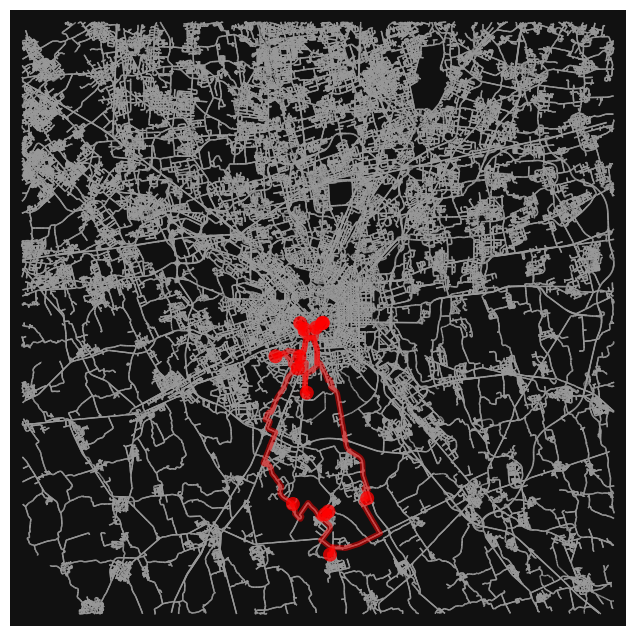

<Figure size 640x480 with 0 Axes>

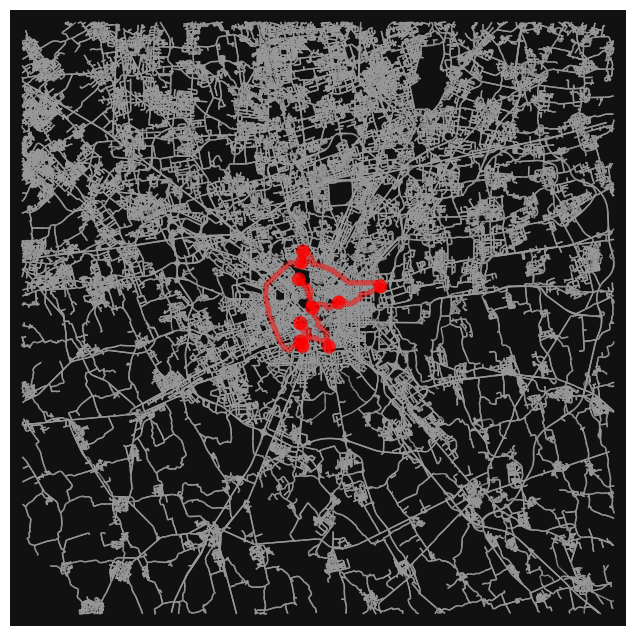

<Figure size 640x480 with 0 Axes>

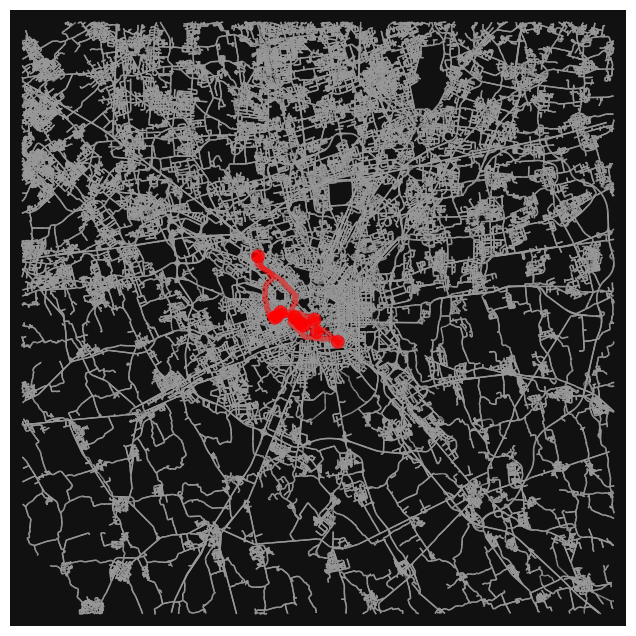

<Figure size 640x480 with 0 Axes>

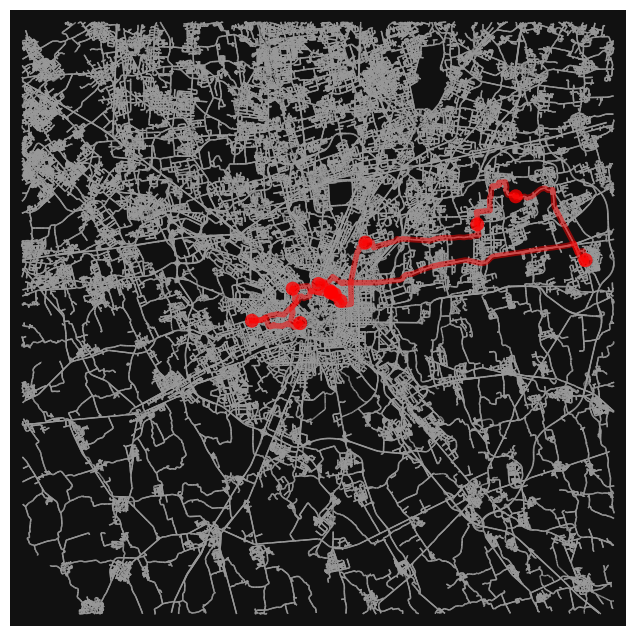

In [43]:
for n in new_job_list:
    route = []
    for i in range(len(new_job_list[n]) - 1):
        if new_job_list[n][i]['Id'] == 'special':
            u = 0
        else:
            u = new_job_list[n][i]['Id'] + 1
        if new_job_list[n][i+1]['Id'] == 'special':
            v = 0
        else:
            v = new_job_list[n][i+1]['Id'] + 1
        if u == v:
            continue
        route.append(shortest_paths[u][v])
    plt.figure()
    ox.plot_graph_routes(G, route, node_size=0)